In [1]:
import pandas as pd
import numpy as np
import re
# For visualizations
import matplotlib.pyplot as plt
import scipy
import re
# For handling string
import string
# For performing mathematical operations
import math
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import unidecode
import seaborn as sns
from collections import Counter 

%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/John/Documents/MMA/Big Data/Assignments/Individual/sentiment_train.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2202 non-null   object
 1   Polarity  2202 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.5+ KB


,Sentence,Polarity
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
#Check for null values 
df.dropna(inplace=True)
df.isnull().sum()

Sentence    0
Polarity    0
dtype: int64

In [4]:
#Creation of EDA information

1089


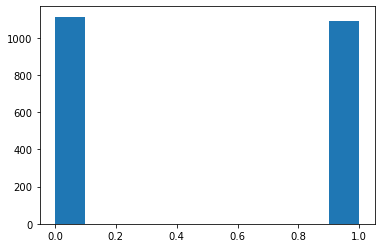

In [5]:
print(sum(df['Polarity']))
plt.hist(df['Polarity'])
plt.show()
#data is fairly balanced.

                                            Sentence  word_count
0                           Wow... Loved this place.           4
1                                 Crust is not good.           4
2          Not tasty and the texture was just nasty.           8
3  Stopped by during the late May bank holiday of...          15
4  The selection on the menu was great and so wer...          12 

count    2202.000000
mean       12.272934
std        36.106970
min         1.000000
25%         5.000000
50%        10.000000
75%        15.000000
max      1393.000000
Name: word_count, dtype: float64 



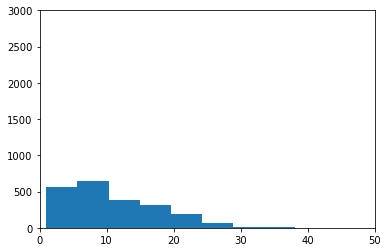

In [6]:
#Word Count of each review
df['word_count'] = df['Sentence'].apply(lambda x: len(str(x).split(" ")))
print(df[['Sentence','word_count']].head(),"\n")
print(df['word_count'].describe(),"\n")
plt.axis([0, 50,0,3000])  #[xmin, xmax, ymin, ymax]
plt.hist(df['word_count'], bins=300)
plt.show()

In [7]:
# there are a few instanc ewith over 40 words that may need to be removed. 

                                            Sentence  char_count_withpunct
0                           Wow... Loved this place.                    24
1                                 Crust is not good.                    18
2          Not tasty and the texture was just nasty.                    41
3  Stopped by during the late May bank holiday of...                    87
4  The selection on the menu was great and so wer...                    59


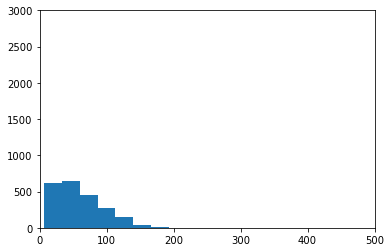

In [8]:
#Character Count of each review
df['char_count_withpunct'] = df['Sentence'].str.len() ## this also includes spaces
print(df[['Sentence','char_count_withpunct']].head())
plt.axis([0, 500,0,3000])  #[xmin, xmax, ymin, ymax]
plt.hist(df['char_count_withpunct'], bins=300)
plt.show()

In [9]:
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']

def count_characters(data_df):
    Sentencecharacters = []
    text_col = data_df['Sentence']
    for i in text_col:
        a = dict(Counter(i))
        b = {k:v for k, v in a.items() if k not in punctuation}
        c = sum(list(b.values()))
        Sentencecharacters.append(c)
    data_df['SentenceChars'] = Sentencecharacters
    return data_df['SentenceChars']
df['SentenceChars'] = count_characters(df)

#number of punctuations 
def numpunct(data_df):
    SentencePuncts = []
    for i in data_df['Sentence']:
        a = dict(Counter(i))
        b = {k:v for k,v in a.items() if k in punctuation}
        c = sum(list(b.values()))
        SentencePuncts.append(c)
    data_df['SentencePuncts'] = SentencePuncts
    return data_df['SentencePuncts']
df['SentencePuncts'] = numpunct(df)

#ratio of  punctuations to characters
def ratio_puncts_chars(data_df):
    return data_df['SentencePuncts'] / data_df['SentenceChars']
df['ratiopunChar'] = ratio_puncts_chars(df)

def numcapwords(data_df):
    SentenceCwords = []
    for i in data_df['Sentence']:
        a = i.split()
        b = [word for word in a if word.isupper()]
        c = len(b)
        SentenceCwords.append(c)
    data_df['SentenceCwords'] = SentenceCwords
    return data_df['SentenceCwords']
df['SentenceCwords'] = numcapwords(df)

In [10]:
print(df['SentenceCwords'].describe(),"\n")
df.head()

count    2202.000000
mean        0.469573
std         1.234897
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        35.000000
Name: SentenceCwords, dtype: float64 



,Sentence,Polarity,word_count,char_count_withpunct,SentenceChars,SentencePuncts,ratiopunChar,SentenceCwords
0,Wow... Loved this place.,1,4,24,20,4,0.200000,0
1,Crust is not good.,0,4,18,17,1,0.058824,0
2,Not tasty and the texture was just nasty.,0,8,41,40,1,0.025000,0
3,Stopped by during the late May bank holiday of...,1,15,87,86,1,0.011628,0
4,The selection on the menu was great and so wer...,1,12,59,58,1,0.017241,0


In [11]:
#Remove contractions from text reviews
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['Sentence_edited']=df['Sentence'].apply(lambda x:expand_contractions(x))

In [12]:
df['Sentence_edited']=df['Sentence_edited'].str.lower()

In [13]:
df['Sentence_edited']=df['Sentence_edited'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [14]:
df['Sentence_edited']=df['Sentence_edited'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [15]:
df.head()

,Sentence,Polarity,word_count,char_count_withpunct,SentenceChars,SentencePuncts,ratiopunChar,SentenceCwords,Sentence_edited
0,Wow... Loved this place.,1,4,24,20,4,0.200000,0,wow loved this place
1,Crust is not good.,0,4,18,17,1,0.058824,0,crust is not good
2,Not tasty and the texture was just nasty.,0,8,41,40,1,0.025000,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,15,87,86,1,0.011628,0,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,12,59,58,1,0.017241,0,the selection on the menu was great and so wer...


In [16]:
#ten most common words in the reviews. 
freq = pd.Series(' '.join(df['Sentence_edited']).split()).value_counts()[:10]
freq


the     1412
i        846
and      846
is       664
a        606
it       585
to       514
was      485
this     462
not      431
dtype: int64

In [17]:
#removal words from above.
freq = list(freq.index)
df['Sentence_edited'] = df['Sentence_edited'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Sentence_edited'].head()

0                                      wow loved place
1                                           crust good
2                             tasty texture just nasty
3    stopped by during late may bank holiday off ri...
4               selection on menu great so were prices
Name: Sentence_edited, dtype: object

In [18]:
freq = pd.Series(' '.join(df['Sentence_edited']).split()).value_counts()[-100:]
freq

peach        1
eel          1
providing    1
frenchman    1
ford         1
            ..
hundred      1
knows        1
handed       1
begin        1
strap        1
Length: 100, dtype: int64

In [19]:
freq = list(freq.index)
df['Sentence_edited'] = df['Sentence_edited'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Sentence_edited'].head()

0                                      wow loved place
1                                           crust good
2                             tasty texture just nasty
3    stopped by during late may bank holiday off st...
4               selection on menu great so were prices
Name: Sentence_edited, dtype: object

In [20]:
#set corpus for stop words
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['Sentence_nostopwords'] = df['Sentence_edited'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

print(df)

                                               Sentence  Polarity  word_count  \
0                              Wow... Loved this place.         1           4   
1                                    Crust is not good.         0           4   
2             Not tasty and the texture was just nasty.         0           8   
3     Stopped by during the late May bank holiday of...         1          15   
4     The selection on the menu was great and so wer...         1          12   
...                                                 ...       ...         ...   
2197  Almost all of the songs in Cover Girl are old-...         0          16   
2198  The most annoying thing about 'Cover Girl' is ...         0          22   
2199  Unfortunately, 'Cover Girl' is an example of h...         0          18   
2200  Non-linear narration thus many flashbacks and ...         1          14   
2201  The good cinematography also makes her and Mon...         1          14   

      char_count_withpunct 

In [21]:
from textblob import Word
df['Sentence_nostopwords_LEMMATIZED'] = df['Sentence_nostopwords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [22]:
df.head()

,Sentence,Polarity,word_count,char_count_withpunct,SentenceChars,SentencePuncts,ratiopunChar,SentenceCwords,Sentence_edited,Sentence_nostopwords,Sentence_nostopwords_LEMMATIZED
0,Wow... Loved this place.,1,4,24,20,4,0.200000,0,wow loved place,wow loved place,wow loved place
1,Crust is not good.,0,4,18,17,1,0.058824,0,crust good,crust good,crust good
2,Not tasty and the texture was just nasty.,0,8,41,40,1,0.025000,0,tasty texture just nasty,tasty texture nasty,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,15,87,86,1,0.011628,0,stopped by during late may bank holiday off st...,stopped late may bank holiday steve recommenda...,stopped late may bank holiday steve recommenda...
4,The selection on the menu was great and so wer...,1,12,59,58,1,0.017241,0,selection on menu great so were prices,selection menu great prices,selection menu great price


In [23]:
#Sentiment Analysis 
from textblob import TextBlob
df['Sentiment']=df['Sentence_nostopwords_LEMMATIZED'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [24]:
df.head()

,Sentence,Polarity,word_count,char_count_withpunct,SentenceChars,SentencePuncts,ratiopunChar,SentenceCwords,Sentence_edited,Sentence_nostopwords,Sentence_nostopwords_LEMMATIZED,Sentiment
0,Wow... Loved this place.,1,4,24,20,4,0.200000,0,wow loved place,wow loved place,wow loved place,0.4
1,Crust is not good.,0,4,18,17,1,0.058824,0,crust good,crust good,crust good,0.7
2,Not tasty and the texture was just nasty.,0,8,41,40,1,0.025000,0,tasty texture just nasty,tasty texture nasty,tasty texture nasty,-1.0
3,Stopped by during the late May bank holiday of...,1,15,87,86,1,0.011628,0,stopped by during late may bank holiday off st...,stopped late may bank holiday steve recommenda...,stopped late may bank holiday steve recommenda...,0.2
4,The selection on the menu was great and so wer...,1,12,59,58,1,0.017241,0,selection on menu great so were prices,selection menu great prices,selection menu great price,0.8


In [25]:
#
#
#
#
#
#Team yonge model code below. 

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000, lowercase=True, stop_words = 'english', ngram_range=(1, 3), min_df = 0.01)
#fit the vectorizers to the data.

features = vectorizer.fit_transform(df['Sentence_nostopwords_LEMMATIZED'])
pandaframe = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())

In [27]:
df1=df[['Polarity', 'word_count','char_count_withpunct','SentenceChars','SentencePuncts','ratiopunChar','SentenceCwords','Sentiment']]
df2= pd.concat([pandaframe.reset_index(drop=True), df1.reset_index(drop=True)], axis=1)

In [28]:
#cleaning data before running regeression
df2.info()
df2 = df2.replace([np.inf, -np.inf], np.nan)
df2["ratiopunChar"]=df2["ratiopunChar"].fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 68 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amazing               2202 non-null   float64
 1   bad                   2202 non-null   float64
 2   battery               2202 non-null   float64
 3   best                  2202 non-null   float64
 4   better                2202 non-null   float64
 5   came                  2202 non-null   float64
 6   case                  2202 non-null   float64
 7   day                   2202 non-null   float64
 8   definitely            2202 non-null   float64
 9   delicious             2202 non-null   float64
 10  disappointed          2202 non-null   float64
 11  ear                   2202 non-null   float64
 12  excellent             2202 non-null   float64
 13  experience            2202 non-null   float64
 14  film                  2202 non-null   float64
 15  fit                  

In [29]:
#The data was split to two parts 80% for training and 20% for testing. 
from sklearn.model_selection import train_test_split

# For X variable, the target variable ("Polarity") was dropped since it will be predicted using the model.
X = df2.drop(["Polarity"], axis=1)

#For y variable, all other variabes are dropped. This variable will be used for assessing the model peformance using the AUC metric
y = df2["Polarity"]
# A random seed was assigned so that our results will be reproducible on the same machine

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df2["Polarity"].values)

In [30]:
df1.head()

,Polarity,word_count,char_count_withpunct,SentenceChars,SentencePuncts,ratiopunChar,SentenceCwords,Sentiment
0,1,4,24,20,4,0.200000,0,0.4
1,0,4,18,17,1,0.058824,0,0.7
2,0,8,41,40,1,0.025000,0,-1.0
3,1,15,87,86,1,0.011628,0,0.2
4,1,12,59,58,1,0.017241,0,0.8


In [31]:
#Logistic Regression classifier without hyperparameter tuning 

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=50000)
log_reg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=50000)

[[176  47]
 [ 46 172]]
AUC Score = 0.789

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       223
           1       0.79      0.79      0.79       218

    accuracy                           0.79       441
   macro avg       0.79      0.79      0.79       441
weighted avg       0.79      0.79      0.79       441



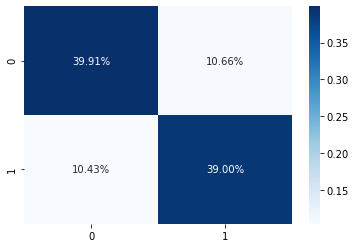

In [32]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# Predicting performance of hypertuned Logistic Regression model

pred_val = log_reg.predict(X_val)

#Get the confusion matrix
cf_matrix = confusion_matrix(y_val,pred_val)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(y_val,pred_val).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


print("AUC Score = {:.3f}".format(roc_auc_score(y_val, pred_val)))
print()
print(classification_report(y_val, pred_val))

In [33]:
#
#
#
#Test Data



In [40]:
df_test = pd.read_csv("C:/Users/John/Documents/MMA/Big Data/Assignments/Individual/sentiment_test.csv")

df_test.head()

,Sentence,Polarity
0,A good commentary of today's love and undoubte...,1
1,For people who are first timers in film making...,1
2,"It was very popular when I was in the cinema, ...",1
3,It's a feel-good film and that's how I felt wh...,1
4,It has northern humour and positive about the ...,1


In [41]:
#Word Count of each review
df_test['word_count'] = df_test['Sentence'].apply(lambda x: len(str(x).split(" ")))
df_test['char_count_withpunct'] = df_test['Sentence'].str.len() 
df_test['SentenceChars'] = count_characters(df_test)
df_test['SentencePuncts'] = numpunct(df_test)
df_test['ratiopunChar'] = ratio_puncts_chars(df_test)
#capitals words
df_test['SentenceCwords'] = numcapwords(df)
#contractions, lowered, punct
df_test['Sentence_edited']=df_test['Sentence'].apply(lambda x:expand_contractions(x))
df_test['Sentence_edited']=df_test['Sentence_edited'].str.lower()
df_test['Sentence_edited']=df_test['Sentence_edited'].apply(lambda x: re.sub('\w*\d\w*','', x))
df_test['Sentence_edited']=df_test['Sentence_edited'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df_test.head()

,Sentence,Polarity,word_count,char_count_withpunct,SentenceChars,SentencePuncts,ratiopunChar,SentenceCwords,Sentence_edited
0,A good commentary of today's love and undoubte...,1,14,72,70,2,0.028571,0,a good commentary of today is love and undoubt...
1,For people who are first timers in film making...,1,18,85,82,3,0.036585,0,for people who are first timers in film making...
2,"It was very popular when I was in the cinema, ...",1,23,106,104,2,0.019231,0,it was very popular when i was in the cinema a...
3,It's a feel-good film and that's how I felt wh...,1,18,76,72,4,0.055556,0,it is a feelgood film and that is how i felt w...
4,It has northern humour and positive about the ...,1,13,72,71,1,0.014085,0,it has northern humour and positive about the ...


In [42]:
#ten most common words in the reviews. 
freq = pd.Series(' '.join(df_test['Sentence_edited']).split()).value_counts()[:10]
#removal words from above.
freq = list(freq.index)
df_test['Sentence_edited'] = df_test['Sentence_edited'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_test['Sentence_edited'].head()


0    good commentary today love undoubtedly film wo...
1    for people who are first timers film making th...
2    was very popular when was cinema good house ve...
3     feelgood film that how felt when came out cinema
4    has northern humour positive about community r...
Name: Sentence_edited, dtype: object

In [43]:
#removal of rare words
freq = pd.Series(' '.join(df_test['Sentence_edited']).split()).value_counts()[-100:]
freq = list(freq.index)
df_test['Sentence_edited'] = df_test['Sentence_edited'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_test['Sentence_edited'].head()

0    good commentary today love undoubtedly film wo...
1    for people who are first timers film making th...
2    was very popular when was cinema good house ve...
3     feelgood film that how felt when came out cinema
4    has northern humour positive about community r...
Name: Sentence_edited, dtype: object

In [44]:
#set corpus for stop words
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df_test['Sentence_nostopwords'] = df_test['Sentence_edited'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

from textblob import Word
df_test['Sentence_nostopwords_LEMMATIZED'] = df_test['Sentence_nostopwords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

#Sentiment Analysis 
from textblob import TextBlob
df_test['Sentiment']=df_test['Sentence_nostopwords_LEMMATIZED'].apply(lambda x:TextBlob(x).sentiment.polarity)

df_test.head()

,Sentence,Polarity,word_count,char_count_withpunct,SentenceChars,SentencePuncts,ratiopunChar,SentenceCwords,Sentence_edited,Sentence_nostopwords,Sentence_nostopwords_LEMMATIZED,Sentiment
0,A good commentary of today's love and undoubte...,1,14,72,70,2,0.028571,0,good commentary today love undoubtedly film wo...,good commentary today love undoubtedly film wo...,good commentary today love undoubtedly film wo...,0.500000
1,For people who are first timers in film making...,1,18,85,82,3,0.036585,0,for people who are first timers film making th...,people first timers film making think excellen...,people first timer film making think excellent...,0.625000
2,"It was very popular when I was in the cinema, ...",1,23,106,104,2,0.019231,0,was very popular when was cinema good house ve...,popular cinema good house good reactions plent...,popular cinema good house good reaction plenty...,0.575000
3,It's a feel-good film and that's how I felt wh...,1,18,76,72,4,0.055556,0,feelgood film that how felt when came out cinema,feelgood film felt came cinema,feelgood film felt came cinema,0.000000
4,It has northern humour and positive about the ...,1,13,72,71,1,0.014085,0,has northern humour positive about community r...,northern humour positive community represents,northern humour positive community represents,0.227273


In [39]:
df.head()

,Sentence,Polarity,word_count,char_count_withpunct,SentenceChars,SentencePuncts,ratiopunChar,SentenceCwords,Sentence_edited,Sentence_nostopwords,Sentence_nostopwords_LEMMATIZED,Sentiment
0,Wow... Loved this place.,1,4,24,20,4,0.200000,0,wow loved place,wow loved place,wow loved place,0.4
1,Crust is not good.,0,4,18,17,1,0.058824,0,crust good,crust good,crust good,0.7
2,Not tasty and the texture was just nasty.,0,8,41,40,1,0.025000,0,tasty texture just nasty,tasty texture nasty,tasty texture nasty,-1.0
3,Stopped by during the late May bank holiday of...,1,15,87,86,1,0.011628,0,stopped by during late may bank holiday off st...,stopped late may bank holiday steve recommenda...,stopped late may bank holiday steve recommenda...,0.2
4,The selection on the menu was great and so wer...,1,12,59,58,1,0.017241,0,selection on menu great so were prices,selection menu great prices,selection menu great price,0.8


In [45]:
#Text Vectorizer  

#fit the vectorizers to the data

features3= vectorizer.transform(df_test['Sentence_nostopwords_LEMMATIZED'])
pandaframe3 = pd.DataFrame(features3.toarray(), columns=vectorizer.get_feature_names())

In [46]:
df4=df_test[['Polarity', 'word_count','char_count_withpunct','SentenceChars','SentencePuncts','ratiopunChar','SentenceCwords','Sentiment']]
df5= pd.concat([pandaframe3.reset_index(drop=True), df4.reset_index(drop=True)], axis=1)

In [47]:
#cleaning data before prediction
df5.info()
df5 = df5.replace([np.inf, -np.inf], np.nan)
df5["ratiopunChar"]=df5["ratiopunChar"].fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 68 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amazing               546 non-null    float64
 1   bad                   546 non-null    float64
 2   battery               546 non-null    float64
 3   best                  546 non-null    float64
 4   better                546 non-null    float64
 5   came                  546 non-null    float64
 6   case                  546 non-null    float64
 7   day                   546 non-null    float64
 8   definitely            546 non-null    float64
 9   delicious             546 non-null    float64
 10  disappointed          546 non-null    float64
 11  ear                   546 non-null    float64
 12  excellent             546 non-null    float64
 13  experience            546 non-null    float64
 14  film                  546 non-null    float64
 15  fit                   5

In [50]:
print(X_test)

     amazing  bad  battery  best  better      came  case  day  definitely  \
0        0.0  0.0      0.0   0.0     0.0  0.000000   0.0  0.0         0.0   
1        0.0  0.0      0.0   0.0     0.0  0.000000   0.0  0.0         0.0   
2        0.0  0.0      0.0   0.0     0.0  0.000000   0.0  0.0         0.0   
3        0.0  0.0      0.0   0.0     0.0  0.697023   0.0  0.0         0.0   
4        0.0  0.0      0.0   0.0     0.0  0.000000   0.0  0.0         0.0   
..       ...  ...      ...   ...     ...       ...   ...  ...         ...   
541      0.0  0.0      0.0   0.0     0.0  0.000000   0.0  0.0         0.0   
542      0.0  0.0      0.0   0.0     0.0  0.000000   0.0  0.0         0.0   
543      0.0  0.0      0.0   0.0     0.0  0.000000   0.0  0.0         0.0   
544      0.0  1.0      0.0   0.0     0.0  0.000000   0.0  0.0         0.0   
545      0.0  0.0      0.0   0.0     0.0  0.000000   0.0  0.0         0.0   

     delicious  ...      work  worst  year  word_count  char_count_withpunc

[[212  37]
 [105 192]]
AUC Score = 0.789

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       249
           1       0.84      0.65      0.73       297

    accuracy                           0.74       546
   macro avg       0.75      0.75      0.74       546
weighted avg       0.76      0.74      0.74       546



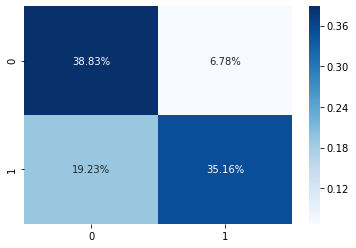

In [54]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# Predicting performance of hypertuned Logistic Regression model

X_test = df5.drop(['Polarity'], axis=1)

# Use your model to make predictions
pred_test = log_reg.predict(X_test)


#Get the confusion matrix
cf_matrix = confusion_matrix(df5['Polarity'],pred_test)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(df5['Polarity'],pred_test).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


print("AUC Score = {:.3f}".format(roc_auc_score(y_val, pred_val)))
print()
print(classification_report(df5['Polarity'],pred_test))